In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('../src')

In [4]:
from d00_utils.db_utils import dbReadWriteClean, dbReadWriteViews
io_clean = dbReadWriteClean()
io_views = dbReadWriteViews()

/home/ubuntu/anaconda3/envs/yoni/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [5]:
def get_recommendation(row):
    return 'normal' if row['value'] >= 60 else 'abnormal' if row['value'] <= 40 else 'greyzone'

In [6]:
measurement_abstract_rpt_df = io_clean.get_table("measurement_abstract_rpt")
print(measurement_abstract_rpt_df.shape)
measurement_abstract_rpt_df.head()

(1568351, 5)


,studyidk,measabstractnumber,name,value,unitname
0,2882,2,(P1/2t)AVM,2.491754,cm2
1,2882,12,Area TSVI,3.606348,cm2
2,2882,43,FE(el-ps4),37.032087,%
3,2882,46,FE(MDD-ps4),35.095355,%
4,2882,125,P1/2t VM,88.291224,ms


In [7]:
measurement_abstract_rpt_df['name'].value_counts()

ASC                        22447
Altura (unidad métrica)    21505
Peso (unidad métrica)      21478
IMC                        21447
ASC (Haycock)              21438
                           ...  
Area VD td                     1
E/A VT                         1
Tmpo. R-R                      1
GP med AP (completo)           1
Tmsv 6-SD (%)                  1
Name: name, Length: 362, dtype: int64

In [8]:
filter_df = measurement_abstract_rpt_df

In [9]:
filter_df = filter_df[filter_df['name'].str.contains('FE')]
filter_df = filter_df[filter_df['value']>=0]
print(filter_df.shape)
filter_df.head()

(85719, 5)


,studyidk,measabstractnumber,name,value,unitname
2,2882,43,FE(el-ps4),37.032087,%
3,2882,46,FE(MDD-ps4),35.095355,%
32,2915,42,FE(cúbico),76.509059,%
33,2915,51,FE(Teich),68.886942,%
48,2966,43,FE(el-ps4),42.469430,%


In [10]:
len(filter_df)/len(measurement_abstract_rpt_df)

0.05465549484777323

In [11]:
filter_df['name'].value_counts()

FE(MDD-ps4)             17222
FE(el-ps4)              16332
FE(Teich)               11741
FE(cúbico)              11736
FE(MDD-ps2)              9476
FE(el-ps2)               9107
FE(MDD-bp)               8938
FE (Bi-Plane) (aCMQ)      591
FE A4C (aCMQ)             262
FE (HM)_phl               250
FEVI Bipl                  49
FE(MDD-bp)esf              12
FE_3D-Vol.                  3
Name: name, dtype: int64

In [12]:
filter_df = filter_df[filter_df['name'].str.contains('ps4')]
print(filter_df.shape)
filter_df.head()

(33554, 5)


,studyidk,measabstractnumber,name,value,unitname
2,2882,43,FE(el-ps4),37.032087,%
3,2882,46,FE(MDD-ps4),35.095355,%
48,2966,43,FE(el-ps4),42.469430,%
49,2966,46,FE(MDD-ps4),47.570583,%
154,5898,51,FE(el-ps4),29.178381,%


In [13]:
len(filter_df)/len(measurement_abstract_rpt_df)

0.02139444550358944

In [14]:
frames_by_volume_mask_df = io_views.get_table('frames_by_volume_mask')
print(frames_by_volume_mask_df.shape)
frames_by_volume_mask_df.head()

(464634, 9)


,instanceidk,indexinmglist,studyidk,frame,view_name,view_exists,view_only,ventricle_only,cycle_only
0,57164,0,2882,8,a4c_ven_ed,f,a4c,ven,ed
1,57164,1,2882,15,a4c_ven_ed,t,a4c,ven,ed
2,58207,0,2966,1,a4c_ven_ed,f,a4c,ven,ed
3,58207,1,2966,8,a4c_ven_ed,t,a4c,ven,ed
4,102950,0,5898,17,a4c_ven_ed,t,a4c,ven,ed


In [15]:
instances_w_labels_df = io_views.get_table('instances_w_labels')
instances_w_labels_df = instances_w_labels_df[(instances_w_labels_df['view']=='a2c') | (instances_w_labels_df['view']=='a4c')]
print(instances_w_labels_df.shape)
instances_w_labels_df.head()

(13478, 5)


,sopinstanceuid,filename,instanceidk,view,studyidk
1,1.2.840.113663.1500.1.365900332.3.7.20120703.9...,8Z0BWZGH,696112,a4c,39531
5,1.2.840.113663.1500.1.365900332.3.12.20120704....,8ZGVB5TY,696426,a4c,39552
6,1.2.840.113663.1500.1.365900332.3.16.20120704....,8ZGVB7C1,696430,a2c,39552
7,1.2.840.113663.1500.1.365900332.3.4.20120704.1...,8ZGVCN6C,696438,a4c,39553
8,1.2.840.113663.1500.1.365900332.3.16.20120704....,8ZGVCPFW,696467,a2c,39553


In [16]:
filter_df = filter_df[filter_df['studyidk'].isin(frames_by_volume_mask_df['studyidk'].unique())]
print(filter_df.shape)

(32814, 5)


In [17]:
len(filter_df)/len(measurement_abstract_rpt_df)

0.020922612348893838

In [18]:
filter_df = filter_df[filter_df['studyidk'].isin(instances_w_labels_df['studyidk'].unique())]
print(filter_df.shape)

(15569, 5)


In [19]:
len(filter_df)/len(measurement_abstract_rpt_df)

0.009926987007372712

In [20]:
len(filter_df['studyidk'].unique())

7806

In [21]:
filter_df['recommendation'] = filter_df.apply(get_recommendation, axis=1)

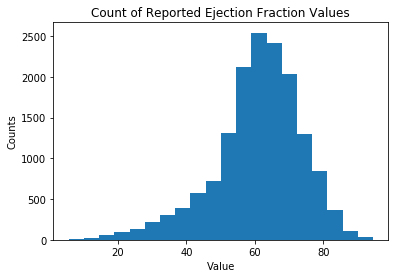

In [22]:
plt.title(f'Count of Reported Ejection Fraction Values')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.hist(filter_df['value'], bins=20);

In [23]:
filter_df['recommendation'].value_counts()

normal      9047
greyzone    5422
abnormal    1100
Name: recommendation, dtype: int64

In [24]:
filter_df.head()

,studyidk,measabstractnumber,name,value,unitname,recommendation
42924,39531,89,FE(el-ps4),28.892011,%,abnormal
42925,39531,92,FE(MDD-ps4),30.358275,%,abnormal
43176,39552,118,FE(el-ps4),57.550646,%,greyzone
43179,39552,121,FE(MDD-ps4),55.920676,%,greyzone
43215,39553,105,FE(el-ps4),50.912022,%,greyzone


In [25]:
measurement_abstract_rpt_df = measurement_abstract_rpt_df[['studyidk', 'measabstractnumber', 'name']]
measurement_abstract_rpt_df.head()

,studyidk,measabstractnumber,name
0,2882,2,(P1/2t)AVM
1,2882,12,Area TSVI
2,2882,43,FE(el-ps4)
3,2882,46,FE(MDD-ps4)
4,2882,125,P1/2t VM


In [26]:
a_measgraphref_df = io_clean.get_table("a_measgraphref")
print(a_measgraphref_df.shape)
a_measgraphref_df.head()

/home/ubuntu/anaconda3/envs/yoni/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(858255, 10)


,studyidk,measabstractnumber,meassequence,instanceidk,indexinmglist,value,howentered,srinstanceidk,imagesopinstanceuid,measurementuid
0,2882,187,0,57164,0,28.242271,0,,,
1,2882,188,0,57164,0,7.897812,0,,,
2,2882,189,0,57164,0,85.725750,0,,,
3,2882,190,0,57164,0,87.190031,0,,,
4,2882,191,0,57164,1,36.654466,0,,,


In [27]:
merge_df = measurement_abstract_rpt_df.merge(a_measgraphref_df, on=['studyidk', 'measabstractnumber'])
print(merge_df.shape)
merge_df.head()

(858255, 11)


,studyidk,measabstractnumber,name,meassequence,instanceidk,indexinmglist,value,howentered,srinstanceidk,imagesopinstanceuid,measurementuid
0,2882,187,AVIts ap4,0,57164,0,28.242271,0,,,
1,2882,188,DVIts ap4,0,57164,0,7.897812,0,,,
2,2882,189,VTS(el-ps4),0,57164,0,85.725750,0,,,
3,2882,190,VTS(MDD-ps4),0,57164,0,87.190031,0,,,
4,2882,191,AVItd ap4,0,57164,1,36.654466,0,,,


In [28]:
merge_df = merge_df[['studyidk', 'instanceidk', 'indexinmglist', 'meassequence', 'name', 'value', 'howentered']]
merge_df.head()

,studyidk,instanceidk,indexinmglist,meassequence,name,value,howentered
0,2882,57164,0,0,AVIts ap4,28.242271,0
1,2882,57164,0,0,DVIts ap4,7.897812,0
2,2882,57164,0,0,VTS(el-ps4),85.725750,0
3,2882,57164,0,0,VTS(MDD-ps4),87.190031,0
4,2882,57164,1,0,AVItd ap4,36.654466,0


In [29]:
filter_df = merge_df

In [30]:
filter_df = filter_df[filter_df['studyidk'].isin(frames_by_volume_mask_df['studyidk'].unique())]
print(filter_df.shape)

(728539, 7)


In [31]:
len(filter_df)/len(measurement_abstract_rpt_df)

0.4645254793091598

In [32]:
filter_df = filter_df[filter_df['studyidk'].isin(instances_w_labels_df['studyidk'].unique())]
print(filter_df.shape)

(335842, 7)


In [33]:
len(filter_df)/len(measurement_abstract_rpt_df)

0.21413701397199988

In [34]:
filter_df = filter_df[filter_df['name'].str.contains('ps4')]
print(filter_df.shape)
filter_df.head()

(32424, 7)


,studyidk,instanceidk,indexinmglist,meassequence,name,value,howentered
24843,39531,696112,0,0,VTS(el-ps4),96.760478,0
24844,39531,696112,0,0,VTS(MDD-ps4),96.121705,0
24847,39531,696112,1,0,VTD(el-ps4),136.075395,0
24848,39531,696112,1,0,VTD(MDD-ps4),138.023154,0
24989,39552,696426,0,0,VTD(el-ps4),150.538057,0


In [35]:
len(filter_df)/len(merge_df)

0.03777898177115193

In [36]:
filter_df = filter_df[filter_df['name'].isin(['VTD(MDD-ps4)', 'VTS(MDD-ps4)', 'VTD(el-ps4)', 'VTS(el-ps4)'])]
print(filter_df.shape)

(32403, 7)


In [37]:
len(filter_df)/len(merge_df)

0.037754513518709475

In [38]:
len(filter_df['studyidk'].unique())

7969

In [39]:
len(filter_df['instanceidk'].unique())

8178

In [40]:
len((filter_df['studyidk'].astype(str) + '_' + filter_df['instanceidk'].astype(str)).unique())

8235

In [41]:
filter_df['name'].value_counts()

VTD(MDD-ps4)    8237
VTD(el-ps4)     8180
VTS(MDD-ps4)    8022
VTS(el-ps4)     7964
Name: name, dtype: int64

In [42]:
filter_df['howentered'].value_counts()

0    32288
4      115
Name: howentered, dtype: int64

In [43]:
filter_df.groupby(['studyidk', 'instanceidk', 'indexinmglist']).agg({'name': list})

name
studyidk instanceidk indexinmglist                             
39531    696112      0              [VTS(el-ps4), VTS(MDD-ps4)]
                     1              [VTD(el-ps4), VTD(MDD-ps4)]
39552    696426      0              [VTD(el-ps4), VTD(MDD-ps4)]
                     1              [VTS(el-ps4), VTS(MDD-ps4)]
39553    696438      0              [VTD(el-ps4), VTD(MDD-ps4)]
...                                                         ...
126794   3004420     1              [VTS(el-ps4), VTS(MDD-ps4)]
126796   3004494     0              [VTD(el-ps4), VTD(MDD-ps4)]
                     1              [VTS(el-ps4), VTS(MDD-ps4)]
         3004496     0              [VTD(el-ps4), VTD(MDD-ps4)]
                     1              [VTS(el-ps4), VTS(MDD-ps4)]

[16202 rows x 1 columns]